Introduction

Importing libraries pandas, numpy, matplotlib, seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Reading sales table data

In [2]:
sales_table = pd.read_csv('../data/generated/sales_data_sample_CLEAN.csv', encoding='CP1252')

Exploring orders stats

In [3]:
round(sales_table['ORDERLINENUMBER'].mean(), 2)

np.float64(6.47)

Average line number per order is 6.47

In [4]:
round((sales_table.groupby(['ORDERNUMBER'])['SALES'].sum()).mean(), 2)

np.float64(32679.57)

Average sales per order is 32679.57

Checking year to year sales

In [5]:
sales_per_year = sales_table.groupby(['YEAR_ID'])['SALES'].sum()
sales_per_year

YEAR_ID
2003    3516979.54
2004    4724162.60
2005    1791486.71
Name: SALES, dtype: float64

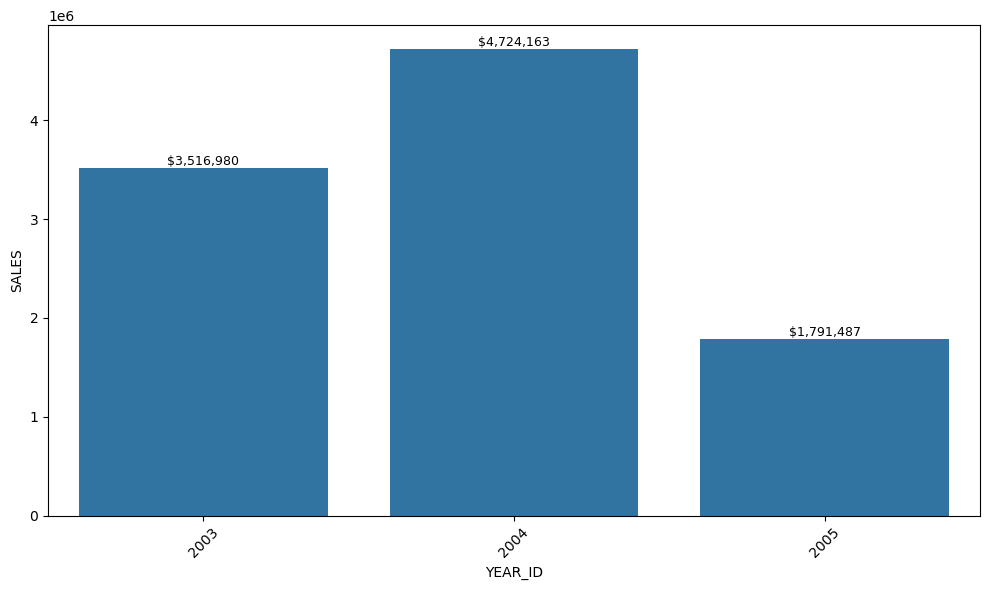

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_per_year)
plt.title('')
plt.xticks(rotation=45)

for i, (year, sales) in enumerate(sales_per_year.items()):
    plt.text(i, sales, f"${sales:,.0f}", 
             ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

In [7]:
sales_table.loc[sales_table['YEAR_ID']==2005, 'MONTH_ID'].unique()

array([2, 3, 4, 5, 1])

Year 2005 data is only till May

Projecting 2005 for the end of the year sales

In [8]:
sales_per_year[2005] = sales_per_year[2005] * (12/5)
sales_per_year

YEAR_ID
2003    3516979.540
2004    4724162.600
2005    4299568.104
Name: SALES, dtype: float64

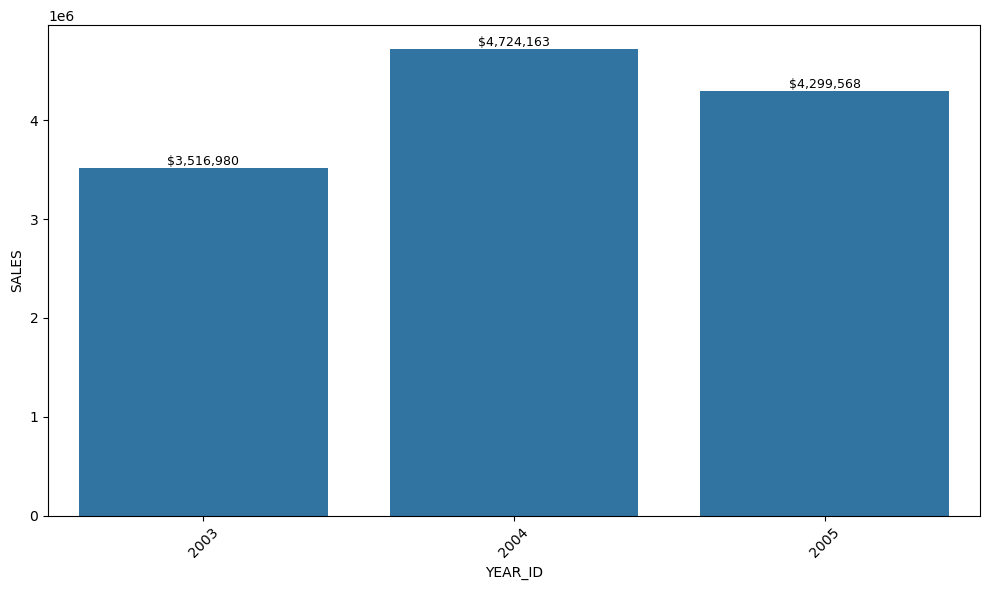

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_per_year)
plt.title('')
plt.xticks(rotation=45)

for i, (year, sales) in enumerate(sales_per_year.items()):
    plt.text(i, sales, f"${sales:,.0f}", 
    ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

In [10]:
sales_per_quarter = sales_table.groupby(['YEAR_ID', 'QTR_ID'])['SALES'].sum().reset_index()
sales_per_quarter

,YEAR_ID,QTR_ID,SALES
0,2003,1,445094.69
1,2003,2,562365.22
2,2003,3,649514.54
3,2003,4,1860005.09
4,2004,1,833730.68
5,2004,2,766260.73
6,2004,3,1109396.27
7,2004,4,2014774.92
8,2005,1,1071992.36
9,2005,2,719494.35


Looks like there was rising in sales 2003 -> 2004, but then 2005 sales is projected to be a bit lower than 2004 sales

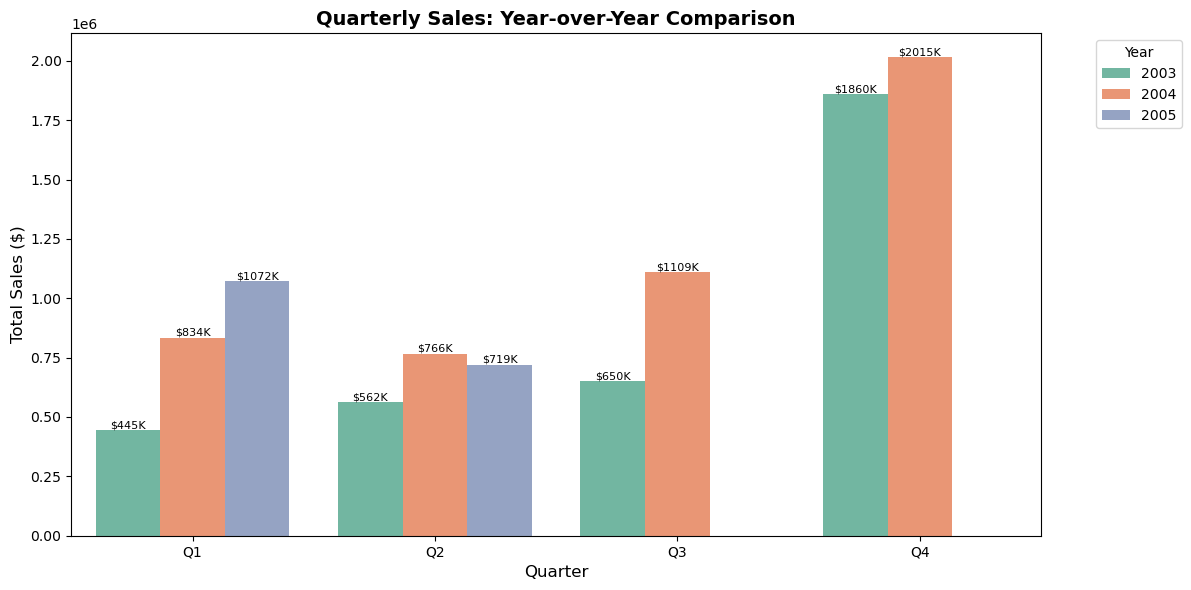

In [11]:
sales_per_quarter['Quarter'] = 'Q' + sales_per_quarter['QTR_ID'].astype(str)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=sales_per_quarter, x='Quarter', y='SALES', hue='YEAR_ID', palette='Set2')

plt.title('Quarterly Sales: Year-over-Year Comparison', fontsize=14, fontweight='bold')
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

for container in ax.containers:
    ax.bar_label(container, fmt='$%.0fK', labels=[f'${v/1000:.0f}K' for v in container.datavalues], fontsize=8)

plt.tight_layout()
plt.show()

Looks like there's a trend of rising sales in Q3 over Q1, Q2 sales. Then sales are doubled in Q4 over Q3 sales

Also there's a rising in sales from 2003 to 2004 in all quarters

In [12]:
pivot_data = sales_per_quarter.pivot(index='QTR_ID', columns='YEAR_ID', values='SALES')
pivot_data['Growth_2003_to_2004_%'] = ((pivot_data[2004] - pivot_data[2003]) / pivot_data[2003]) * 100
pivot_data['Growth_2004_to_2005_%'] = ((pivot_data[2005] - pivot_data[2004]) / pivot_data[2004]) * 100
pivot_data

YEAR_ID,2003,2004,2005,Growth_2003_to_2004_%,Growth_2004_to_2005_%
QTR_ID,,,,,
1,445094.69,833730.68,1071992.36,87.315351,28.577775
2,562365.22,766260.73,719494.35,36.256778,-6.103194
3,649514.54,1109396.27,NaN,70.803916,NaN
4,1860005.09,2014774.92,NaN,8.320936,NaN


growth shown from year to year 2003-2004 in all quarters, and especially to be huge rise in Q1 and Q3.

In [13]:
sales_per_month = sales_table.groupby(['YEAR_ID', 'MONTH_ID'])['SALES'].sum().reset_index()
sales_per_month

,YEAR_ID,MONTH_ID,SALES
0,2003,1,129753.60
1,2003,2,140836.19
2,2003,3,174504.90
3,2003,4,201609.55
4,2003,5,192673.11
5,2003,6,168082.56
6,2003,7,187731.88
7,2003,8,197809.30
8,2003,9,263973.36
9,2003,10,568290.97


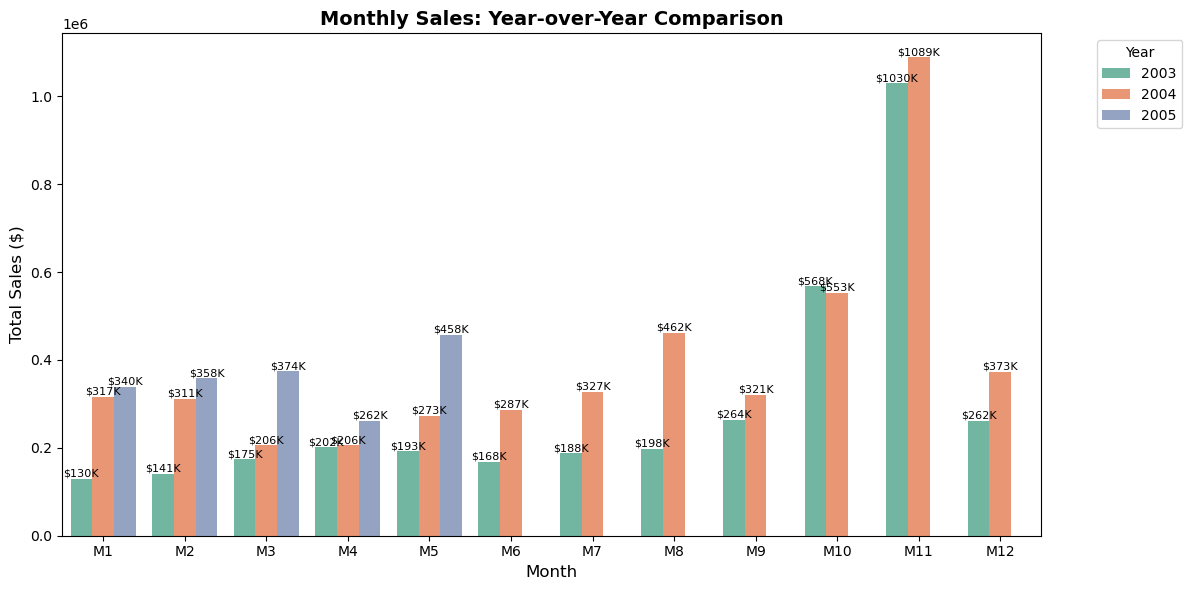

In [14]:
sales_per_month['Month'] = 'M' + sales_per_month['MONTH_ID'].astype(str)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=sales_per_month, x='Month', y='SALES', hue='YEAR_ID', palette='Set2')

plt.title('Monthly Sales: Year-over-Year Comparison', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

for container in ax.containers:
    ax.bar_label(container, fmt='$%.0fK', labels=[f'${v/1000:.0f}K' for v in container.datavalues], fontsize=8)

plt.tight_layout()
plt.show()

Shown that 2055 is rising above 2003, 2004 in all months

Looks like October and November are the best selling months. With November scoring double sales than October.

In [15]:
sales_per_country = sales_table.groupby(['COUNTRY'])['SALES'].sum().sort_values(ascending=False)
sales_per_country

COUNTRY
USA            3627982.83
Spain          1215686.92
France         1110916.52
Australia       630623.10
UK              478880.46
Italy           374674.31
Finland         329581.91
Norway          307463.70
Singapore       288488.41
Denmark         245637.15
Canada          224078.56
Germany         220472.09
Sweden          210014.21
Austria         202062.53
Japan           188167.81
Switzerland     117713.56
Belgium         108412.62
Philippines      94015.73
Ireland          57756.43
Name: SALES, dtype: float64

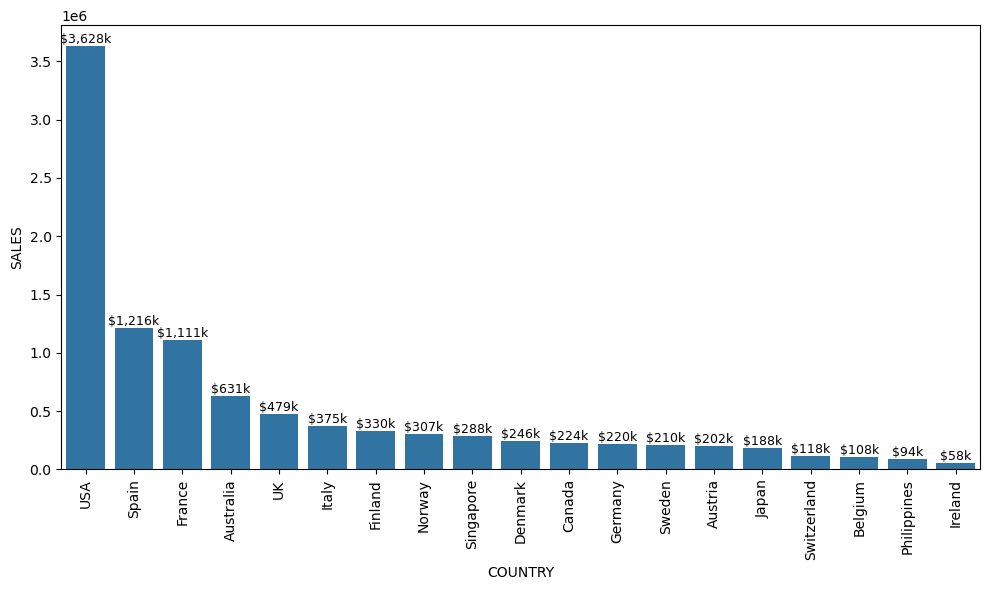

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_per_country)
plt.title('')
plt.xticks(rotation=90)

for i, (country, sales) in enumerate(sales_per_country.items()):
    plt.text(i, sales, f"${sales/1000:,.0f}k",
    ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

Looks like the biggest market is USA with 3.628m

Then outside USA, come Spain (1.216m) and France (1.111m)

In [19]:
sales_per_city = sales_table.groupby(['CITY'])['SALES'].sum().sort_values(ascending=False).head(20)
sales_per_city

CITY
Madrid           1082551.44
San Rafael        654858.06
NYC               560787.77
Singapore         288488.41
Paris             268944.68
San Francisco     224358.68
New Bedford       207874.86
Nantes            204304.86
Melbourne         200995.41
Brickhaven        165255.20
San Jose          160010.27
Manchester        157807.81
Boston            154069.66
North Sydney      153996.13
Chatswood         151570.98
Philadelphia      151189.13
Salzburg          149798.63
Kobenhavn         145041.60
Lyon              142874.25
Reggio Emilia     142601.33
Name: SALES, dtype: float64

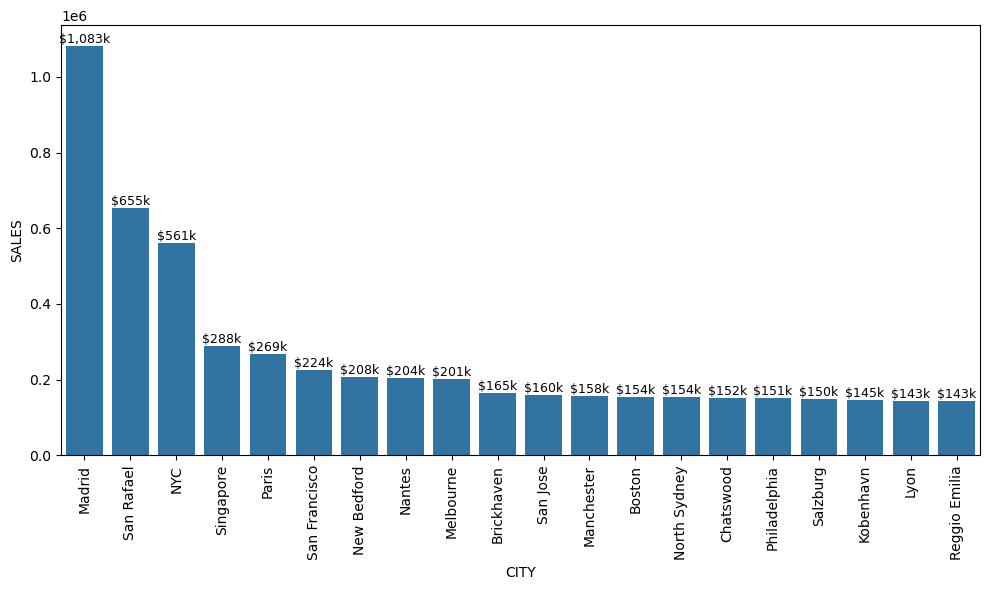

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_per_city)
plt.title('')
plt.xticks(rotation=90)

for i, (country, sales) in enumerate(sales_per_city.items()):
    plt.text(i, sales, f"${sales/1000:,.0f}k",
    ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

Madrid comes with the highest source of revenue with 1.083m

Then comes San Rafael (655k) and NYC (561k)